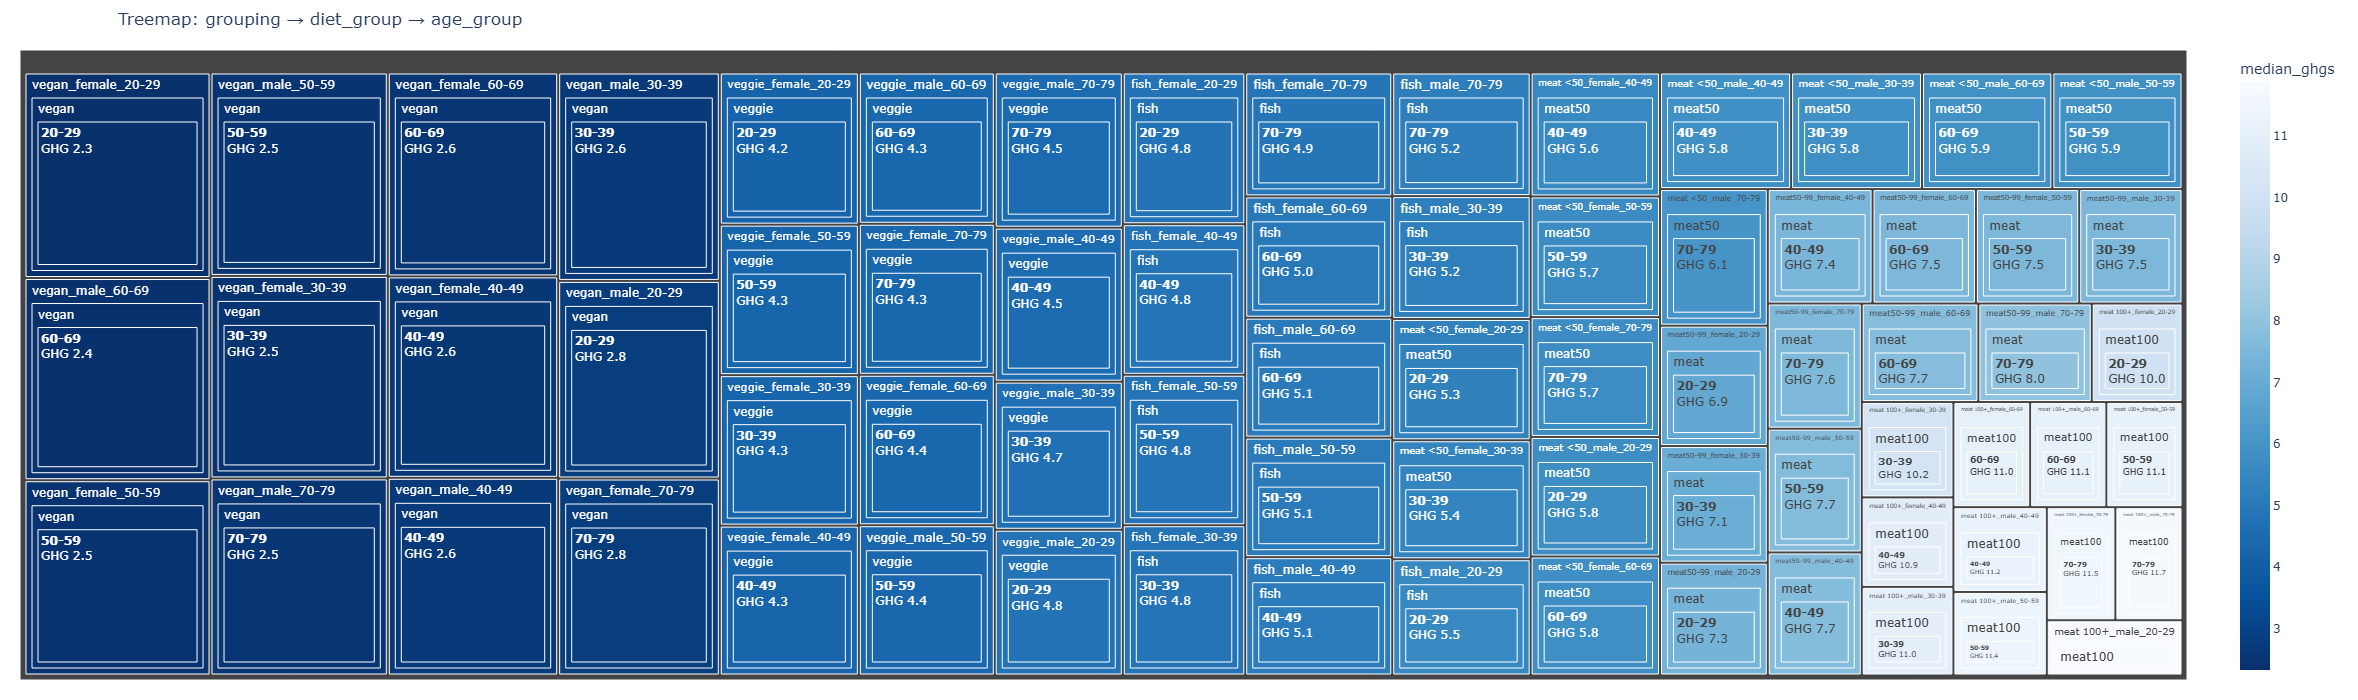

In [5]:
import pandas as pd
import plotly.express as px

# ------ 1. Read & Process Data ------
df = pd.read_csv(r'C:/Users/Amane/Desktop/Results_21Mar2022.csv')
# Drop missing values and calculate median GHG for each group
agg = (
    df
    .dropna(subset=['grouping','diet_group','age_group','mean_ghgs'])
    .groupby(['grouping','diet_group','age_group'], observed=False)['mean_ghgs']
    .median()
    .reset_index(name='median_ghgs')
)
# Calculate "friendliness" value (used for area size)
agg['friendliness'] = 1 / agg['median_ghgs']

# ------ 2. Create Three-Level Treemap ------
fig = px.treemap(
    agg,
    path=['grouping','diet_group','age_group'],   # Three-level hierarchy
    values='friendliness',
    color='median_ghgs',
    color_continuous_scale='Blues_r',
    hover_data={'median_ghgs':':.2f', 'friendliness':':.4f'},
    title='Treemap: grouping → diet_group → age_group'
)

# ------ 3. Set Fixed Square Canvas ------
fig.update_layout(
    width=700,     # Square width
    height=700,    # Square height
    autosize=False,
    margin=dict(l=20, r=20, t=50, b=20)
)

# ------ 4. Text & Style Adjustments ------
fig.update_traces(
    texttemplate='<b>%{label}</b><br>GHG %{customdata[0]:.1f}',
    textfont_size=12
)

fig.show()